# Imports

In [71]:
# Plotting
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import Rectangle
import matplotlib.patches as mpatches
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Math + stats
import numpy as np
import pandas as pd
from scipy.stats import binom

# Logistics
from os.path import sep
from tqdm import tqdm
import time

# Local modules
import nested_simulation_functions
import disc_score

# Enable re-load of local modules every time they are called
%load_ext autoreload
%autoreload 2
%aimport numpy 
%aimport pandas

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data

## Data path

In [4]:
data_folder = 'Documents{0}Github{0}CEGIS{0}DiscSim_figures_and_data{0}Abhijit Singh 2024 AP audit data{0}Data{0}Raw_data'.format(sep)

## Paper test (L0 data)

In [6]:
filepath = '{0}{1}ap_paper_pooled.csv'.format(data_folder, sep)
L0_data = pd.read_csv(filepath)

In [7]:
L0_data

,StudentID,an_schcd,Schoolmanagement,Tablet,Tablet_a,Class,Gender,setType,eq1,eq2,...,math_per,english_per,telugu_per,math_total_common,english_total_common,telugu_total_common,math_per_common,english_per_common,telugu_per_common,p_tab
0,12721,63638,NaN,NaN,NaN,4,F,3.0,NaN,1.0,...,43.333332,33.333332,76.666664,12,6,18,50.000000,25.000000,75.000000,NaN
1,12718,63638,NaN,NaN,NaN,4,F,3.0,NaN,1.0,...,63.333332,70.000000,76.666664,15,21,20,62.500000,87.500000,83.333336,NaN
2,12723,63638,NaN,NaN,NaN,4,F,1.0,1.0,1.0,...,50.000000,56.666668,83.333336,14,14,21,58.333332,58.333332,87.500000,NaN
3,12719,63638,NaN,NaN,NaN,4,F,1.0,1.0,1.0,...,93.333336,93.333336,93.333336,22,22,23,91.666664,91.666664,95.833336,NaN
4,12722,63638,NaN,NaN,NaN,4,F,2.0,NaN,1.0,...,60.000000,63.333332,80.000000,16,14,19,66.666664,58.333332,79.166664,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12748,12713,12933,33-MPP_ZPP SCHOOLS,0.0,0.0,4,M,1.0,0.0,0.0,...,23.333334,23.333334,13.333333,6,6,3,25.000000,25.000000,12.500000,0.0
12749,12714,12933,33-MPP_ZPP SCHOOLS,0.0,0.0,4,M,1.0,1.0,1.0,...,23.333334,43.333332,46.666668,6,10,10,25.000000,41.666668,41.666668,0.0
12750,12711,12933,33-MPP_ZPP SCHOOLS,0.0,0.0,4,M,2.0,NaN,1.0,...,36.666668,30.000000,30.000000,10,7,8,41.666668,29.166666,33.333332,0.0
12751,12716,12933,33-MPP_ZPP SCHOOLS,0.0,0.0,4,F,1.0,1.0,1.0,...,30.000000,43.333332,70.000000,7,10,16,29.166666,41.666668,66.666664,0.0


## L2 data - external audit

In [8]:
filepath = '{0}{1}ap_retest_pooled.csv'.format(data_folder, sep)
L2_data = pd.read_csv(filepath)

In [9]:
L2_data

,ID,StudentID,an_schcd,Tablet,Tablet_a,Sample,Class,gender,eq1,eq2,...,english_per,telugu_per,math_total_common,english_total_common,telugu_total_common,math_per_common,english_per_common,telugu_per_common,Schoolmanagement,p_tab
0,1863,4.859257e+06,37494,1,1,1,4,F,0,1,...,20.000000,46.666668,7,6,11,29.166666,25.000000,45.833332,33-MPP_ZPP SCHOOLS,1.0
1,1860,4.840747e+06,37494,1,1,1,4,F,0,0,...,3.333333,23.333334,1,1,6,4.166666,4.166666,25.000000,33-MPP_ZPP SCHOOLS,1.0
2,1862,4.859240e+06,37494,1,1,1,4,F,0,0,...,26.666666,46.666668,7,7,11,29.166666,29.166666,45.833332,33-MPP_ZPP SCHOOLS,1.0
3,1857,4.840739e+06,37494,1,1,1,4,F,0,1,...,30.000000,50.000000,11,7,12,45.833332,29.166666,50.000000,33-MPP_ZPP SCHOOLS,1.0
4,1861,4.840710e+06,37494,1,1,1,4,F,0,0,...,6.666666,13.333333,2,2,3,8.333333,8.333333,12.500000,33-MPP_ZPP SCHOOLS,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4075,2691,1.550554e+12,50781,1,1,1,4,F,1,1,...,26.666666,66.666664,10,6,15,41.666668,25.000000,62.500000,38-Pvt.Unaided,1.0
4076,2696,NaN,50781,1,1,1,5,F,1,1,...,33.333332,46.666668,7,6,11,29.166666,25.000000,45.833332,38-Pvt.Unaided,1.0
4077,2693,NaN,50781,1,1,1,5,F,1,1,...,46.666668,86.666664,15,11,20,62.500000,45.833332,83.333336,38-Pvt.Unaided,1.0
4078,2694,NaN,50781,1,1,1,5,M,1,1,...,33.333332,43.333332,7,7,11,29.166666,29.166666,45.833332,38-Pvt.Unaided,1.0


# Calculate discrepancy

## Merge datasets on student ID

In [49]:
L0_student_id = L0_data.StudentID
L2_student_id = [int(i) for i in L2_data.StudentID if not np.isnan(i) and not np.isinf(i)]

L0_match_indices = [i for i in range(len(L0_student_id)) if L0_student_id[i] in L2_student_id]
L2_match_indices = [np.where(L2_student_id == L0_student_id[i])[0][0] for i in L0_match_indices]

n_students = len(L0_match_indices)
print('{0} matching student IDs'.format(n_students))

# Make sure L0 and L2 student IDs match
assert(np.sum(np.abs([L0_student_id[L0_match_indices[i]] - L2_student_id[L2_match_indices[i]] 
                      for i in range(n_students)])) == 0)

776 matching student IDs


## Get score for each subject

In [89]:
L0_scores = {
    'Maths': [L0_data.math_per_common[i] for i in L0_match_indices],
    'English': [L0_data.english_per_common[i] for i in L0_match_indices],
    'Telugu': [L0_data.telugu_per_common[i] for i in L0_match_indices],
            }

L2_scores = {
    'Maths': [L2_data.math_per_common[i] for i in L2_match_indices],
    'English': [L2_data.english_per_common[i] for i in L2_match_indices],
    'Telugu': [L2_data.telugu_per_common[i] for i in L2_match_indices],
            }

## Plot scores for each subject

### Scatter plots

Text(0, 0.5, 'Teacher score')

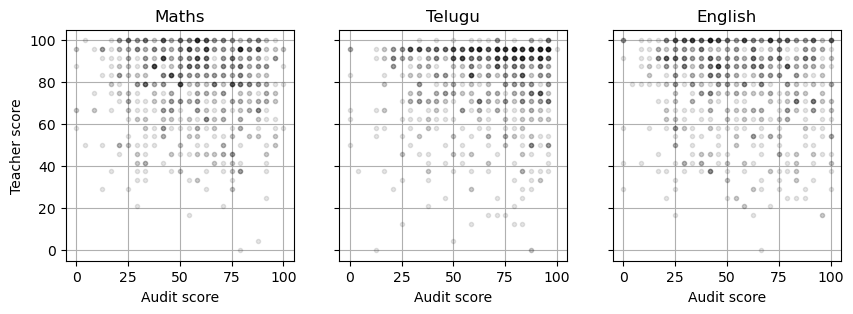

In [91]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, sharex = True, sharey = True, figsize = [10, 3])
ax[0].set_xlim([-5, 105])
ax[0].set_ylim([-5, 105])

i = 0
for subject in ['Maths', 'Telugu', 'English']:
    ax[i].scatter(L2_scores[subject], L0_scores[subject], color = 'k', marker = '.', zorder = 10,
                 alpha = 0.1)
    ax[i].set_xlabel('Audit score')
    ax[i].grid(zorder = 2)
    ax[i].set_title(subject)
    i += 1

ax[0].set_ylabel('Teacher score')

### 2D histogram

Text(0, 0.5, 'Teacher score')

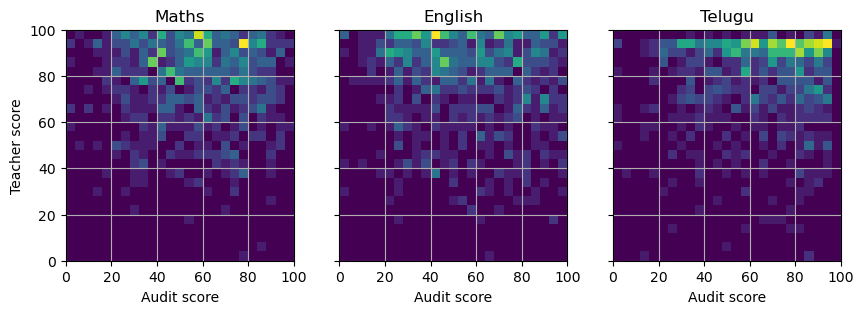

In [77]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, sharex = True, sharey = True, figsize = [10, 3])
ax[0].set_xlim([-5, 105])
ax[0].set_ylim([-5, 105])

i = 0
for subject in ['Maths', 'English', 'Telugu']:
    ax[i].hist2d(L2_scores[subject], L0_scores[subject], bins = 25)
    ax[i].set_xlabel('Audit score')
    ax[i].grid(zorder = 2)
    ax[i].set_title(subject)
    i += 1

ax[0].set_ylabel('Teacher score')

## Discrepancy

Text(0, 0.5, 'Discrepancy (teacher - audit)')

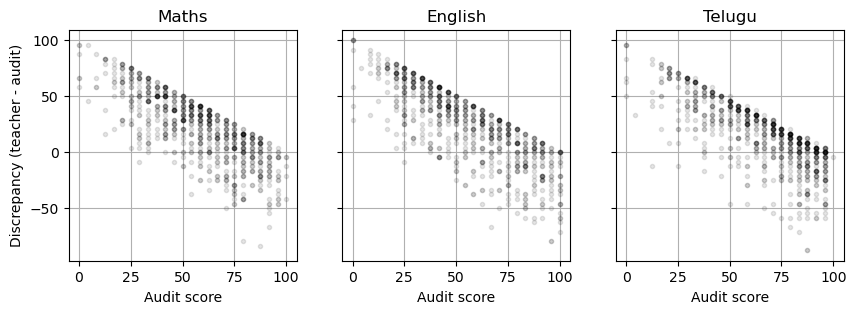

In [75]:
discrepancy_method = 'simple_difference' # L0 minus L2
disc = {subject: [disc_score.discrepancy_score(L0_scores[subject][i], L2_scores[subject][i],
                                              discrepancy_method) for i in range(n_students)] 
       for subject in ['Maths', 'English', 'Telugu']}

fig, ax = plt.subplots(nrows = 1, ncols = 3, sharex = True, sharey = True, figsize = [10, 3])
ax[0].set_xlim([-5, 105])
#ax[0].set_ylim([-5, 105])

i = 0
for subject in ['Maths', 'English', 'Telugu']:
    ax[i].scatter(L2_scores[subject], disc[subject], color = 'k', marker = '.', zorder = 10,
                 alpha = 0.1)
    ax[i].set_xlabel('Audit score')
    ax[i].grid(zorder = 2)
    ax[i].set_title(subject)
    i += 1

ax[0].set_ylabel('Discrepancy (teacher - audit)')

## Average discrepancy for a particular audit score

/Users/amrita/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/amrita/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Text(0, 0.5, 'Discrepancy (teacher - audit)')

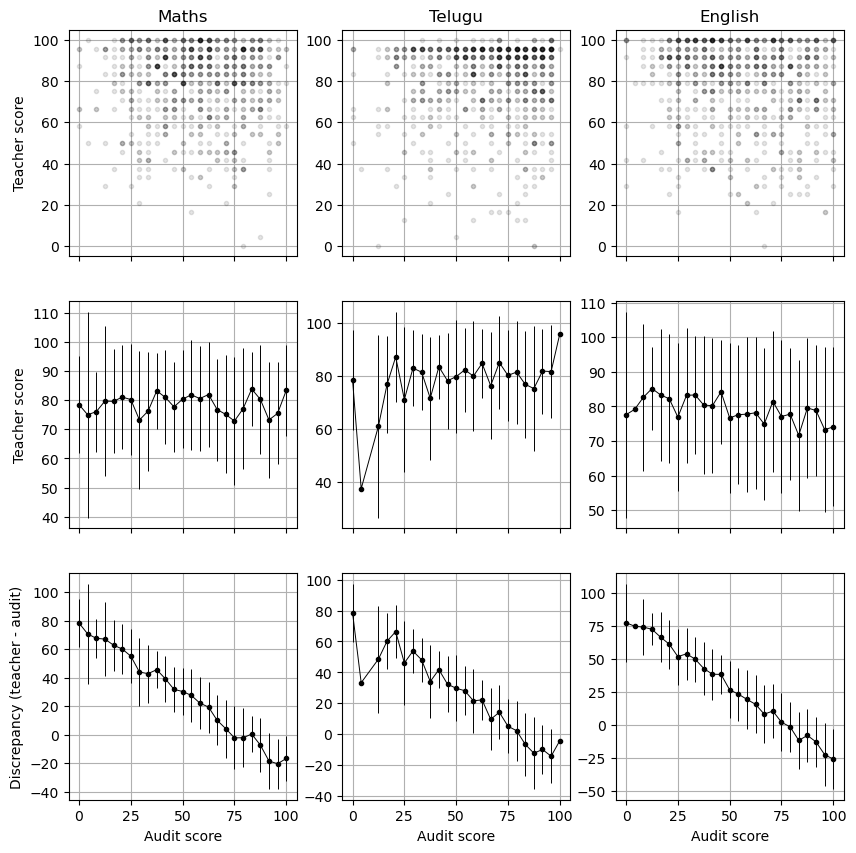

In [105]:
L0_scores_by_L2_score = {}

fig, ax = plt.subplots(nrows = 3, ncols = 3, sharex = True, sharey = False, figsize = [10, 10])
ax[0, 0].set_xlim([-5, 105])
#ax[0].set_ylim([-5, 105])

col = 0
for subject in ['Maths', 'Telugu', 'English']:
    
    L2_unique = np.unique(L2_scores[subject])
    n_L2_unique = len(L2_unique)
    L0_scores_by_L2_score[subject] = {i: [L0_scores[subject][j] 
                                     for j in np.where(L2_scores[subject] == L2_unique[i])[0].astype(int)] 
                                 for i in range(n_L2_unique)}
    for j in range(n_L2_unique):
        
        n_L0_scores = len(L0_scores_by_L2_score[subject][j])
        
        # Scatter plot - all L0 scores for a particular L2 score
        ax[0, col].scatter(np.ones(n_L0_scores)*L2_unique[j], L0_scores_by_L2_score[subject][j], 
                        color = 'k', marker = '.', zorder = 10,
                     alpha = 0.1)
        
    # Line plot - mean and variance of L0 scores for a particular L2 score
    ax[1, col].errorbar(L2_unique, [np.mean(L0_scores_by_L2_score[subject][j]) for j in range(n_L2_unique)],
                        [np.std(L0_scores_by_L2_score[subject][j], ddof = 1) for j in range(n_L2_unique)],
                    color = 'k', marker = '.', zorder = 10, linewidth = 0.7,
                 alpha = 1)
    
    # Mean and variance of discrepancy for a particular L2 score
    ax[2, col].errorbar(L2_unique, [np.mean(L0_scores_by_L2_score[subject][j] - L2_unique[j]) for j in range(n_L2_unique)],
                        [np.std(L0_scores_by_L2_score[subject][j] - L2_unique[j], ddof = 1) for j in range(n_L2_unique)],
                    color = 'k', marker = '.', zorder = 10, linewidth = 0.7,
                 alpha = 1)
        
    ax[2, col].set_xlabel('Audit score')
    ax[0, col].grid(zorder = 2)
    ax[1, col].grid()
    ax[2, col].grid()
    ax[0, col].set_title(subject)
    col += 1

for row in range(2):
    ax[row, 0].set_ylabel('Teacher score')
ax[2, 0].set_ylabel('Discrepancy (teacher - audit)')

Note negative discrepancies when audit scores are high (i.e. teachers appear to be incorrectly reducing marks for students who score very high on the external test).

# Estimate measurement error

## Fit a line to model the linear integrity distortion

Maths: Integrity distortion = real marks * -1.02 + 80.11
Telugu: Integrity distortion = real marks * -0.98 + 78.27
English: Integrity distortion = real marks * -1.08 + 83.19


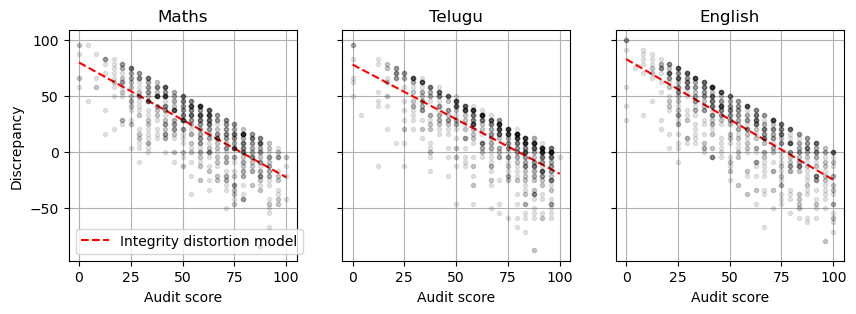

In [123]:
integrity_model = {}

fig, ax = plt.subplots(nrows = 1, ncols = 3, sharex = True, sharey = True, figsize = [10, 3])
#ax[0].set_xlim([-5, 105])
#ax[0].set_ylim([-5, 105])

i = 0
for subject in ['Maths', 'Telugu', 'English']:
    
    integrity_model[subject] = np.polyfit(L2_scores[subject], disc[subject], 1)
    
    ax[i].scatter(L2_scores[subject], disc[subject], color = 'k', marker = '.', zorder = 10,
                 alpha = 0.1)
    
    x_vals = np.unique(L2_scores[subject])
    ax[i].plot(x_vals, x_vals*integrity_model[subject][0] + integrity_model[subject][1],
              color = 'r', linestyle = '--', linewidth = 1.5, label = 'Integrity distortion model')
    
    ax[i].set_xlabel('Audit score')
    ax[i].grid(zorder = 2)
    ax[i].set_title(subject)
    i += 1

ax[0].set_ylabel('Discrepancy')
ax[0].legend()

for subject in ['Maths', 'Telugu', 'English']:
    print('{0}: Integrity distortion = real marks * {1} + {2}'.format(subject,
                                                            np.round(integrity_model[subject][0], 2), 
                                                            np.round(integrity_model[subject][1], 2)))

## Subtract integrity distortion trend line to extract measurement error

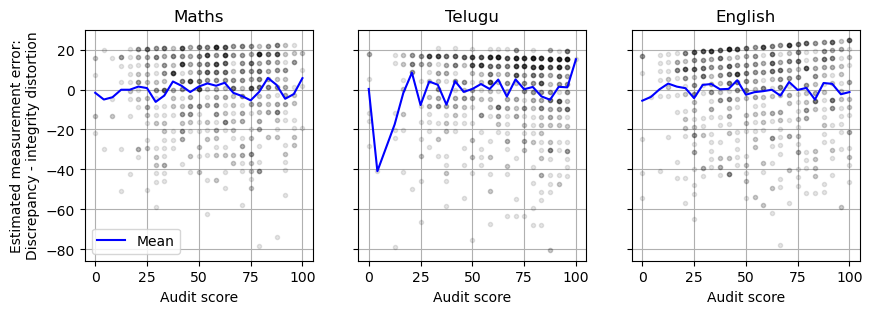

In [120]:
meas_error = {}
meas_error_by_L2_score = {}

fig, ax = plt.subplots(nrows = 1, ncols = 3, sharex = True, sharey = True, figsize = [10, 3])
#ax[0].set_xlim([-5, 105])
#ax[0].set_ylim([-5, 105])

i = 0
for subject in ['Maths', 'Telugu', 'English']:
    
    meas_error[subject] = [disc[subject][i] - L2_scores[subject][i]*integrity_model[subject][0]
                          - integrity_model[subject][1] for i in range(n_students)]
    
    ax[i].scatter(L2_scores[subject], meas_error[subject], color = 'k', marker = '.', zorder = 10,
                 alpha = 0.1)
    
    # Get mean measurement erorr for a particular L2 score
    L2_unique = np.unique(L2_scores[subject])
    n_L2_unique = len(L2_unique)
    meas_error_by_L2_score[subject] = {i: [meas_error[subject][j] 
                                     for j in np.where(L2_scores[subject] == L2_unique[i])[0].astype(int)] 
                                 for i in range(n_L2_unique)}
    
    ax[i].plot(L2_unique, [np.mean(meas_error_by_L2_score[subject][j]) for j in range(n_L2_unique)],
                        #[np.std(meas_error_by_L2_score[subject][j], ddof = 1) for j in range(n_L2_unique)],
                    color = 'blue', zorder = 10, linewidth = 1.5, label = 'Mean',
                 alpha = 1)
    
    ax[i].set_xlabel('Audit score')
    ax[i].grid(zorder = 2)
    ax[i].set_title(subject)
    i += 1

ax[0].set_ylabel('Estimated measurement error:\nDiscrepancy - integrity distortion')
ax[0].legend()